# Logistic Regression

- Model Machine Learning for Classification cases, especially for binary classification

- Formula $\displaystyle \hat{y} = \frac {1} {1 + e ^ {-(mx + c)}}$ dengan $e$ bilangan Euler $2.718...$

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# data hasil promo kartu kredit thd pelanggan usia tertentu
df = pd.DataFrame({
    'usia': range(25, 55),
#     'beli': df['usia'].apply(lambda x: 1 if x >= 40 else 0)
})
df['beli'] = df['usia'].apply(lambda x: 1 if x >= 40 else 0)
df.head()

,usia,beli
0,25,0
1,26,0
2,27,0
3,28,0
4,29,0


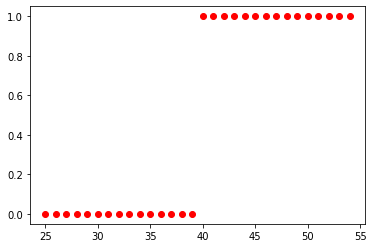

In [50]:
plt.plot(df['usia'], df['beli'], 'ro')
plt.show()

In [51]:
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

In [52]:
modelA = LinearRegression()
modelB = LogisticRegression()

In [53]:
# model.fit(x 2d, y 1d)
modelA.fit(df[['usia']], df['beli'])
modelB.fit(df[['usia']], df['beli'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# gradient/slope/m & intercept/c modelA LinReg
print(modelA.coef_[0])
print(modelA.intercept_)

0.050055617352614004
-1.4771968854282531


In [55]:
# gradient/slope/m & intercept/c modelB LogReg
print(modelB.coef_[0, 0])
print(modelB.intercept_[0])

1.194503274280553
-47.18287885881219


In [56]:
# best fit line modelA y = mx + c
df['predA1'] = modelA.coef_[0] * df['usia'] + modelA.intercept_
df['predA2'] = modelA.predict(df[['usia']])
df.head(3)
# kalau < 0.5 = tidak beli 0 & > 0.5 = beli 1

,usia,beli,predA1,predA2
0,25,0,-0.225806,-0.225806
1,26,0,-0.175751,-0.175751
2,27,0,-0.125695,-0.125695


In [57]:
# best fit line modelB (probability) y = 1 / 1 + e^-(mx + c)
df['probaB1'] = 1 / (1 + np.exp(-1 * (modelB.coef_[0,0] * df['usia'] + modelB.intercept_[0])))
df['predB1'] = modelB.predict(df[['usia']])
df.head()

# y = 1 / 1 + e^-(mx + c) = nilai probability
# threshold = 0.5
# hasil prediksi? probability < threshold, maka predict = 0
#                 probability > threshold, maka predict = 1

,usia,beli,predA1,predA2,probaB1,predB1
0,25,0,-0.225806,-0.225806,3.005319e-08,0
1,26,0,-0.175751,-0.175751,9.923314e-08,0
2,27,0,-0.125695,-0.125695,3.276595e-07,0
3,28,0,-0.075640,-0.075640,1.081904e-06,0
4,29,0,-0.025584,-0.025584,3.572348e-06,0


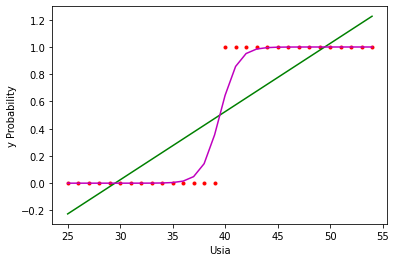

In [58]:
# visualisasi best fit line model A & B
plt.plot(df['usia'], df['beli'], 'r.')
plt.plot(df['usia'], df['predA1'], 'g-')
plt.plot(df['usia'], df['probaB1'], 'm-')
plt.xlabel('Usia'); plt.ylabel('y Probability')
plt.show()

In [59]:
# probability
# modelB.predict_proba(df[['usia']])
# [9.99999970e-01, 3.00531898e-08] = 0.99 tidak beli (0) & 3e-08 beli (1)

df['probaBbeli'] = modelB.predict_proba(df[['usia']])[:, 1]
df['probaBtidakbeli'] = modelB.predict_proba(df[['usia']])[:, 0]
df.head()

,usia,beli,predA1,predA2,probaB1,predB1,probaBbeli,probaBtidakbeli
0,25,0,-0.225806,-0.225806,3.005319e-08,0,3.005319e-08,1.000000
1,26,0,-0.175751,-0.175751,9.923314e-08,0,9.923314e-08,1.000000
2,27,0,-0.125695,-0.125695,3.276595e-07,0,3.276595e-07,1.000000
3,28,0,-0.075640,-0.075640,1.081904e-06,0,1.081904e-06,0.999999
4,29,0,-0.025584,-0.025584,3.572348e-06,0,3.572348e-06,0.999996


In [60]:
# cek akurasi
from sklearn.metrics import accuracy_score

print(modelB.score(df[['usia']], df['beli']))
print(accuracy_score(df['beli'], modelB.predict(df[['usia']])))

1.0
1.0


<hr>

### Iris dataset classification

Using Logistic Regression model

In [76]:
from sklearn.datasets import load_iris
dataIris = load_iris()

In [77]:
dir(dataIris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [79]:
dfIris = pd.DataFrame(
    dataIris['data'],
    columns = ['SL', 'SW', 'PL', 'PW']
)
dfIris['target'] = dataIris['target']
dfIris['spesies'] = dfIris['target'].apply(lambda x: dataIris['target_names'][x])

# dfIris
dfIris[dfIris['target'] == 0].head()

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [80]:
# train test split: training 80%, testing: 20%
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(dfIris[['SL','SW','PL','PW']], dfIris['spesies'], test_size=.2)
print(len(xtr), len(xts))

120 30


In [81]:
modelIris = LogisticRegression(multi_class='auto', solver='liblinear')

In [82]:
# model ditraining dengan 80% dataset (random)
modelIris.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# model ditrain dg 80%, memprediksi semua data X
dfIris['prediksi'] = modelIris.predict(dfIris[['SL', 'SW', 'PL', 'PW']])
dfIris.head()

,SL,SW,PL,PW,target,spesies,prediksi
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,setosa,setosa
2,4.7,3.2,1.3,0.2,0,setosa,setosa
3,4.6,3.1,1.5,0.2,0,setosa,setosa
4,5.0,3.6,1.4,0.2,0,setosa,setosa


In [68]:
# cek nilai probability tiap data
proba = modelIris.predict_proba(dfIris[['SL', 'SW', 'PL', 'PW']])

dfIris['proba0'] = proba[:, 0]
dfIris['proba1'] = proba[:, 1]
dfIris['proba2'] = proba[:, 2]
dfIris

,SL,SW,PL,PW,target,spesies,prediksi,proba0,proba1,proba2
0,5.1,3.5,1.4,0.2,0,setosa,setosa,0.892432,0.107522,0.000046
1,4.9,3.0,1.4,0.2,0,setosa,setosa,0.814610,0.185280,0.000110
2,4.7,3.2,1.3,0.2,0,setosa,setosa,0.868275,0.131626,0.000099
3,4.6,3.1,1.5,0.2,0,setosa,setosa,0.842853,0.156945,0.000202
4,5.0,3.6,1.4,0.2,0,setosa,setosa,0.909591,0.090361,0.000048
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,virginica,0.001758,0.218519,0.779723
146,6.3,2.5,5.0,1.9,2,virginica,virginica,0.001391,0.365478,0.633131
147,6.5,3.0,5.2,2.0,2,virginica,virginica,0.002181,0.273911,0.723908
148,6.2,3.4,5.4,2.3,2,virginica,virginica,0.001690,0.114833,0.883477


In [69]:
# prediksi meleset
dfIris[dfIris['spesies'] != dfIris['prediksi']]

,SL,SW,PL,PW,target,spesies,prediksi,proba0,proba1,proba2
56,6.3,3.3,4.7,1.6,1,versicolor,virginica,0.026837,0.436921,0.536242
59,5.2,2.7,3.9,1.4,1,versicolor,virginica,0.040420,0.448529,0.511051
66,5.6,3.0,4.5,1.5,1,versicolor,virginica,0.015927,0.355636,0.628437
70,5.9,3.2,4.8,1.8,1,versicolor,virginica,0.008448,0.229822,0.761730
77,6.7,3.0,5.0,1.7,1,versicolor,virginica,0.006359,0.466494,0.527147
78,6.0,2.9,4.5,1.5,1,versicolor,virginica,0.017273,0.488416,0.494311
83,6.0,2.7,5.1,1.6,1,versicolor,virginica,0.001836,0.373719,0.624445
84,5.4,3.0,4.5,1.5,1,versicolor,virginica,0.013612,0.305813,0.680575
85,6.0,3.4,4.5,1.6,1,versicolor,virginica,0.049122,0.366471,0.584406


In [75]:
# akurasi model thd data training & data testing
print(modelIris.score(xtr, ytr))
print(modelIris.score(xts, yts))
print(modelIris.score(dfIris[['SL','SW','PL','PW']], dfIris["spesies"]))

0.9583333333333334
0.8666666666666667
0.94


In [73]:
1 - (len(dfIris[dfIris['spesies'] != dfIris['prediksi']]) / len(dfIris))

0.94